<p style="text-align: center">
    <img src="../../assets/images/untref-logo-negro.svg" style="height: 50px;" />
</p>

<h3 style="text-align: center">Estructuras de Datos</h3>

<h2 style="text-align: center">Clase 5: Grafos y Orden topológico</h3>

Un grafo en el contexto de las estructuras de datos es un tipo abstracto de
datos (TAD), que consiste en un conjunto de nodos (también llamados vértices) y
un conjunto de arcos (aristas) que establecen relaciones entre los nodos.

$$
G = \left( V, A \right)
$$

<p style="text-align: center">
    <img src="figuras/grafo-definicion.png" style="width: 500px;" />
</p>

El **mapa de subtes de Buenos Aires** puede ser representado con un grafo.

Las estaciones son los **vértices** y los tramos de vías las **aristas**.

<p style="text-align: center">
    <img src="figuras/subte-mapa.png" style="width: 500px;" />
</p>

El **plan de estudios** de una carrera.

Las materias son los **vértices** y las dependencias son las **aristas**.

<p style="text-align: center">
    <img src="figuras/plan-de-estudios.png" style="width: 400px;" />
</p>

## Definiciones

### Grafo ponderado

Un **grafo ponderado**, **valorado** o **con pesos** es un grafo en el que las aristas tienen un valor o **peso** asociado. También puede denominarse **distancia** o **costo**.

<p style="text-align: center">
    <img src="figuras/grafo-con-pesos.png" style="width: 500px;" />
</p>

### Grafo dirigido vs no dirigido

Un **grafo dirigido** o **digrafo** es un tipo de grafo en el cual las aristas tienen un sentido definido, a diferencia del grafo no dirigido, en el cual las aristas son relaciones simétricas y no apuntan en ningún sentido.

Graficamente se identidica como una línea con una flecha indicando el sentido en el cual se puede "viajar" de un nodo a otro.

<p style="text-align: center">
    <img src="figuras/grafo-dirigido.png" style="width: 500px;" />
</p>

### Camino

Un **camino** es una sucesión de vértices y aristas dentro de un grafo.

Dos vértices están conectados o son accesibles si existe un camino que forma una trayectoria para llegar de uno al otro; en caso contrario, los vértices están desconectados o bien son inaccesibles.

Un **camino simple** es un camino sin vértices repetidos; de ahora en adelante cuando hablemos de "camino" es en referencia un camino simple.

<p style="text-align: center">
    <img src="figuras/grafo-camino.png" style="width: 500px;" />
</p>

### Costo de un camino

Dos vértices pueden estar conectados por varios caminos. El costo de un camino es la sumatoria del costo de sus aristas (también podemos encontrarlo como la **longitud** del camino).

- Para grafos sin pesos: cantidad de aristas que pertenecen al camino.
- Para grafos con pesos: suma de los pesos de las aristas que pertenecen al camino.

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align: center">
                    <img src="figuras/grafo-camino.png" style="width: 500px;" />
                </p>
            </td>
            <td style="width: 60%;">

Por ejemplo, del grafo anterior:

Podemos decir que existe un **camino** entre $A$ y $E$.

Entonces, dados los pesos de cada arista:

$$(A, B) = 4; (B, C) = 2; (C, D)= 4; (D, E) = 3$$

el costo del camino $A-E$ es:

$$4 + 2 + 4 + 3 = 13$$
</td>
        </tr>
    </tbody>
</table>

### Ciclo

Es un camino que además es cerrado, es decir que comienza y termina en el mismo
nodo.

En este caso podemos pensar si ya que el nodo inicial y final son el mismo y se
repite, lo que no se pueden repetir son las aristas que confirman el ciclo.

<p style="text-align: center">
    <img src="figuras/grafo-ciclo.png" style="width: 500px;" />
</p>

### Grafo Dirigido Acíclico

Un Grafo dirigido acíclico o de sus siglas en inglés _DAG_ es un grafo cuyas aristas tienen un único sentido y que además no presenta ciclos.

<p style="text-align:center;">
    <img src="figuras/grafo-teoria.png" style="width:500px;" />
</p>

<p style="text-align:center;">
    ¿Es un DAG? 👆
</p>

### Grado de entrada de un vértice

Cantidad de aristas que apuntan a un vértice.

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-teoria.png" style="width:500px;" />
                </p>
            </td>
            <td>

|  Vertice    | Grado de entrada |
|  :-: |  --: |
| `V0` |   1  |
| `V1` |   1  |
| `V2` |   1  |
| `V3` |   2  |
| `V4` |   2  |
| `V5` |   3  |
| `V6` |   2  |
</td>
        </tr>
    </tbody>
</table>

## Representación

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-teoria.png" style="width:500px;" />
                </p>
            </td>
            <td>

```python
V = {"V0", "V1", "V2", "V3", "V4", "V5", "V6"}
A = {
    ("V0", "V1", 2), ("V0", "V3", 1),
    ("V1", "V3", 3), ("V1", "V4", 10), 
    ("V3", "V4", 2), ("V3", "V6", 4),
    ("V3", "V5", 8), ("V3", "V2", 2),
    ("V2", "V0", 4), ("V2", "V5", 5),
    ("V4", "V6", 6), ("V6", "V5", 1),
}
G = (V, A)
```
</td>
        </tr>
    </tbody>
</table>

### Matriz de adyacencias

Numeramos los vértices de $0$ a $n-1$. Si hay una arista del vértice $i$ al vértice $j$, ponemos su costo en el lugar `m[i][j]`. Si no hay una arista entre ambos, ponemos `None` o `math.inf` en ese lugar.

Su complejidad espacial es $O(|V|^2)$.

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-teoria.png" style="width:500px;" />
                </p>
            </td>
            <td>

|      | `V0` | `V1` | `V2` | `V3` | `V4` | `V5` | `V6` |
|  :-: |  :-: |  :-: |  :-: |  :-: |  :-: |  :-: |  :-: |
| `V0` |   -  |   2  |   -  |   1  |   -  |   -  |   -  |
| `V1` |   -  |   -  |   -  |   3  |  10  |   -  |   -  |
| `V2` |   4  |   -  |   -  |   -  |   -  |   5  |   -  |
| `V3` |   -  |   -  |   2  |   -  |   2  |   8  |   4  |
| `V4` |   -  |   -  |   -  |   -  |   -  |   -  |   5  |
| `V5` |   -  |   -  |   -  |   -  |   -  |   -  |   -  |
| `V6` |   -  |   -  |   -  |   -  |   -  |   1  |   -  |
</td>
        </tr>
    </tbody>
</table>

<p style="text-align:center;">
    ¿Y si fuera dirigido? 🤔
</p>

### Lista de adyacencias

Para cada vértice mantenemos una lista con los vértices accesibles (adyacentes) desde él.

Su complejidad espacial es $O(|V|+|A|)$

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-teoria.png" style="width:500px;" />
                </p>
            </td>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-lista-adyacencias.dio.svg" />
                </p>
            </td>
        </tr>
    </tbody>
</table>

## Algoritmos

### Ordenamiento topológico

Sea $G$ un Grafo Dirigido Acíclico (_DAG_), se quiere listar los vértices $V$ en un orden que respete el sentido de las aristas.

Para un grafo dado, el ordenamiento topológico no es único.

<p style="text-align:center;">
    <img src="figuras/grafo-orden-topologico.png" style="width:500px;" />
</p>

> Un ordenamiento topológico de un grafo dirigido $G$ es un orden total $\prec$ en los vértices tal que $u \prec v$ para cada arista $u \rightarrow v$.

De manera menos formal, un ordenamiento topológico organiza los vértices a lo largo de una línea horizontal de modo que todas las aristas apunten de izquierda a derecha.

#### Algoritmo

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>

```
ORDEN TOPOLÓGICO (G: DiGrafo)
    q <- Cola vacía

    PARA CADA v EN G.nodos:
        SI v.grado_entrada == 0:
            q.encolar(v)

    MIENTRAS NO q.esta_vacia:
        v = q.desencolar()

        VISITAR v

        PARA CADA w EN v.nodos_adyacentes:
            w.grado_entrada -= 1

            SI w.grado_entrada == 0:
                q.encolar(w)

    SI quedaron nodos sin imprimir:
        REPORTAR error: grafo con ciclos
```
</td>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-orden-topologico.png" style="width:500px;" />
                </p>
            </td>
        </tr>
    </tbody>
</table>

<table style="width: 100%;">
    <tbody>
        <tr>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-orden-topologico.png" style="width:500px;" />
                </p>
            </td>
            <td>
                <p style="text-align:center;">
                    <img src="figuras/grafo-orden-topologico-solucion.png" style="width:500px;" />
                </p>
            </td>
        </tr>
    </tbody>
</table>

Un ordenamiento topológico es claramente imposible si el grafo $G$ tiene un ciclo dirigido: ¡un vértice más a la derecha del ciclo tendría una arista apuntando hacia la izquierda!

#### Aplicaciones

| Aplicación | Vértice | Arista |
| :-: | :-: | :-: |
| programación de tareas | tarea | restricciones de precedencia |
| orden de cursada | materia | correlatividad |
| herencia | clases | a quienes extiende |
| hojas de cálculo | celda | fórmula |

#### Ejemplo

In [ ]:
from edd.grafo import DiGrafo

G = DiGrafo()
G.agregar_arista("V0", "V1")
G.agregar_arista("V0", "V3")
G.agregar_arista("V1", "V3")
G.agregar_arista("V1", "V4")
G.agregar_arista("V2", "V0")
G.agregar_arista("V2", "V5")
G.agregar_arista("V3", "V4")
G.agregar_arista("V3", "V6")
G.agregar_arista("V3", "V5")
G.agregar_arista("V4", "V6")
G.agregar_arista("V6", "V5")

print(G)

<p style="text-align:center;">
    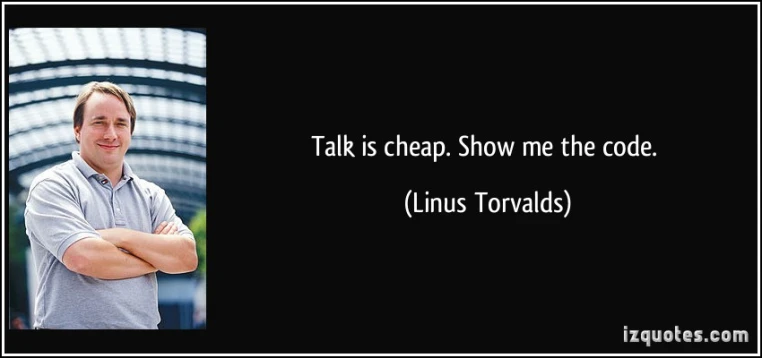
</p>

In [ ]:
from edd.jp import render_python_tutor

render_python_tutor(
    """
vertices = {}

v = ('A',)
w = ('B',)

v = vertices.setdefault(v, v)
w = vertices.setdefault(w, w)

v = ('B',)
w = ('C',)

v = vertices.setdefault(v, v)
w = vertices.setdefault(w, w)
"""
)

In [ ]:
from edd.cola import Cola
from edd.grafo import DiGrafo


def orden_topologico_por_pasos(self, visitar=None):
    q = Cola()

    grado_entrada = {v: v.grado_entrada for v in self.vertices}
    for v, g in grado_entrada.items():
        if g == 0:
            q.encolar(v)

    visitados = []  ### IGNORAR
    aristas = []  ### IGNORAR

    yield {
        "msj": "Encolamos todos los nodos con grado de entrada 0",
        "q": q,
        "visitados": visitados,
        "aristas": aristas,
        "grado_entrada": grado_entrada,
    }  ### IGNORAR

    while not q.esta_vacia():
        v = q.desencolar()

        if visitar:
            visitar(v)

        visitados.append(v.id)  ### IGNORAR

        yield {
            "msj": f"Desencolamos y visitamos {v.id}",
            "q": q,
            "visitados": visitados,
            "aristas": aristas,
            "grado_entrada": grado_entrada,
        }  ### IGNORAR

        for w in v.adyacentes:
            grado_entrada[w] -= 1

            yield {
                "msj": f"Desde {v.id} decrementamos el grado de entrada de {w.id}, que queda en {grado_entrada[w]}",
                "q": q,
                "visitados": visitados,
                "aristas": aristas,
                "grado_entrada": grado_entrada,
            }  ### IGNORAR

            if grado_entrada[w] == 0:
                aristas.append((v.id, w.id))
                q.encolar(w)

                yield {
                    "msj": f"Encolamos {w.id} ya que su grado de entrada está en 0",
                    "q": q,
                    "visitados": visitados,
                    "aristas": aristas,
                    "grado_entrada": grado_entrada,
                }  ### IGNORAR

    yield {
        "msj": f"No quedan nodos sin visitar en q, terminamos de recorrer",
        "q": q,
        "visitados": visitados,
        "aristas": aristas,
        "grado_entrada": grado_entrada,
    }  ### IGNORAR


# Hacemos "monkey patching" del método que acabamos de implementar.
DiGrafo.orden_topologico_por_pasos = orden_topologico_por_pasos

In [ ]:
# Ejecutar esto una vez para inicializar el Orden Topológico paso a paso.

from edd.grafo import DiGrafo

G = DiGrafo()
G.agregar_arista("V0", "V1")
G.agregar_arista("V0", "V3")
G.agregar_arista("V1", "V3")
G.agregar_arista("V1", "V4")
G.agregar_arista("V2", "V0")
G.agregar_arista("V2", "V5")
G.agregar_arista("V3", "V4")
G.agregar_arista("V3", "V6")
G.agregar_arista("V3", "V5")
G.agregar_arista("V4", "V6")
G.agregar_arista("V6", "V5")

pasos = G.orden_topologico_por_pasos()

In [ ]:
# Cada vez que se ejecute esta celda, se mostrará una iteración de Orden Topológico.
from edd.jp import build_html_table, render_html

try:
    estado = next(pasos)
except StopIteration:
    print("~ Fin ~\n\n")
finally:
    print(f">>> {estado['msj']}\n")
    print(f"        q = {estado['q']}")
    print(f"Visitados = {estado['visitados']}")

    G.draw(
        highlight_edges=estado["aristas"],
        highlight_nodes=estado["visitados"],
        node_labels={v.id: grado for v, grado in estado["grado_entrada"].items()},
    )

#### Usandolo en la vida real

In [ ]:
from edd.grafo import DiGrafo, Vertice

G = DiGrafo()
G.agregar_arista("V0", "V1")
G.agregar_arista("V0", "V3")
G.agregar_arista("V1", "V3")
G.agregar_arista("V1", "V4")
G.agregar_arista("V2", "V0")
G.agregar_arista("V2", "V5")
G.agregar_arista("V3", "V4")
G.agregar_arista("V3", "V6")
G.agregar_arista("V3", "V5")
G.agregar_arista("V4", "V6")
G.agregar_arista("V6", "V5")

nodos = []


def agregar_a_nodos(v: Vertice) -> None:
    nodos.append(v.id)


G.orden_topologico(agregar_a_nodos)

nodos

#### ¿Y si el grafo tiene un ciclo?

In [ ]:
from edd.grafo import DiGrafo

G_con_ciclo = DiGrafo()
G_con_ciclo.agregar_arista("X", "Y")
G_con_ciclo.agregar_arista("Z", "X")
G_con_ciclo.agregar_arista("Y", "W")
G_con_ciclo.agregar_arista("Z", "Y")
G_con_ciclo.agregar_arista("W", "X")
G_con_ciclo.agregar_arista("V", "Z")
G_con_ciclo.agregar_arista("W", "T")

G_con_ciclo.draw()

In [ ]:
from edd.grafo import GrafoConCicloError


def visitar_nodo(v: Vertice) -> None:
    print(f"Se visitó el nodo: {v}")


try:
    G_con_ciclo.orden_topologico(visitar_nodo)
except GrafoConCicloError as err:
    print(err)

#### Plan de estudio

Veamos un ejemplo con un plan de estudio de la carrera.

In [ ]:
import csv

from edd.grafo import DiGrafo

with open("plan-2019.csv", encoding="utf-8") as plan_fd:
    materias = csv.reader(plan_fd)
    plan = {}
    next(materias)  # esto saltea los encabezados en el CSV.
    for codigo, nombre, correlativas, _, _ in materias:
        correlativas = correlativas.split()
        plan[codigo] = (nombre, correlativas)

G = DiGrafo()
for nombre_hacia, correlativas in plan.values():
    for codigo_desde in correlativas:
        nombre_desde, _ = plan[codigo_desde]
        G.agregar_arista(nombre_desde, nombre_hacia)

print(G)

In [ ]:
from edd.jp import render_graphviz_svg

render_graphviz_svg(G.to_networkx())

In [ ]:
nodos = []


def agregar_a_nodos(v: Vertice) -> None:
    nodos.append(v.id)


G.orden_topologico(agregar_a_nodos)

nodos